Categorical Cross Entropy
---
Multiclass için kullanılan loss fonksiyonudur.
Y nin one hot encoding uygulanmış olması lazım

Sparse Categorical Cross Entropy
---
Multiclass için kullanılan loss fonksiyonudur.
Y nin label encoding olması lazım




In [2]:
#MLP----> Multi Layer Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,random_state=1)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)

In [182]:
model=MLPClassifier(solver="lbfgs",activation="relu",learning_rate="constant",
                    learning_rate_init=0.005,hidden_layer_sizes=(100,100,100,100,100),verbose=True,max_iter=100,early_stopping=True,random_state=1)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 100, 100, 100),
              learning_rate_init=0.005, max_iter=100, random_state=1,
              solver='lbfgs', verbose=True)

In [183]:
prediction=model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [5]:
from tensorflow.keras import layers,models

model=models.Sequential()

In [6]:
model.add(layers.Dense(10,activation="relu",input_shape=(4,))) #Input Layer , #input sayısı input_shape='ten
model.add(layers.Dense(50,activation="relu")) #hidden layer
model.add(layers.Dense(3,activation="softmax")) #Exit layer

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(X_train,y_train,epochs=100,verbose=True,validation_data=(X_val,y_val))

Epoch 1/100
3/3 [==============================] - 1s 115ms/step - loss: 1.1570 - accuracy: 0.3778 - val_loss: 1.1128 - val_accuracy: 0.4667
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 1.1199 - accuracy: 0.4222 - val_loss: 1.0788 - val_accuracy: 0.4667
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 1.0873 - accuracy: 0.4333 - val_loss: 1.0455 - val_accuracy: 0.4667
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 1.0534 - accuracy: 0.4778 - val_loss: 1.0142 - val_accuracy: 0.4667
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 1.0205 - accuracy: 0.5222 - val_loss: 0.9848 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9933 - accuracy: 0.5333 - val_loss: 0.9553 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.9637 - accuracy: 0.5556 - val_loss: 0.9265 - val_accuracy: 0.5667
Epoch 8/100
3/3 [==

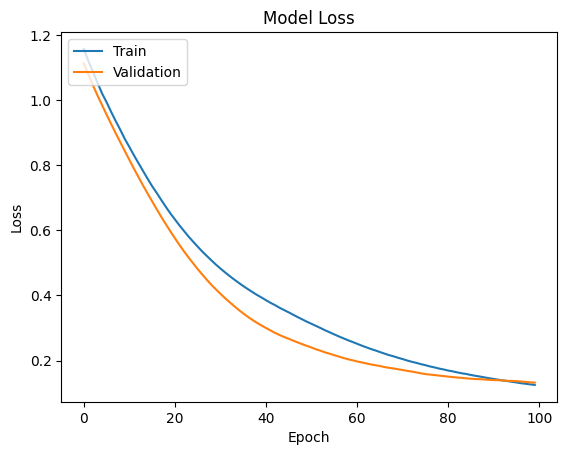

In [7]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="upper left")
plt.show()

1/1 [==============================] - 0s 32ms/step


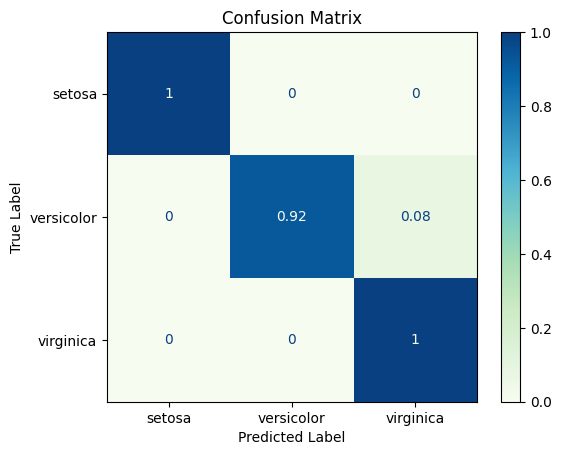

In [12]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import numpy as np

prediction=model.predict(X_test)
prediction=np.argmax(prediction,axis=1)
y_test=np.asarray(y_test)
cm=confusion_matrix(y_test,prediction,normalize='true').round(2)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=iris.target_names)

disp=disp.plot(cmap=plt.cm.GnBu,values_format='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()